In [1]:
import numpy as np
import pandas as pd

In [56]:
data = pd.read_csv("owid-covid-data.csv",usecols=['continent','location','date','new_cases','new_cases_smoothed','new_deaths'])
data.head()

,continent,location,date,new_cases,new_cases_smoothed,new_deaths
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN
1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN
2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN
3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN
4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN


In [69]:
data_india = data.query('location=="India"').reset_index()
data_india.drop(['index','new_cases_smoothed','new_deaths'],axis=1,inplace=True)
# data_india = np.where(data.location == "India")
data_india.head()

,continent,location,date,new_cases
0,Asia,India,2020-01-30,1.0
1,Asia,India,2020-01-31,0.0
2,Asia,India,2020-02-01,0.0
3,Asia,India,2020-02-02,1.0
4,Asia,India,2020-02-03,1.0


In [70]:
data_india.corr()

,new_cases
new_cases,1.0


In [58]:
data_india.tail(30)

,continent,location,date,new_cases
422,Asia,India,2021-03-27,62714.0
423,Asia,India,2021-03-28,68020.0
424,Asia,India,2021-03-29,56211.0
425,Asia,India,2021-03-30,53480.0
426,Asia,India,2021-03-31,72330.0
427,Asia,India,2021-04-01,81466.0
428,Asia,India,2021-04-02,89129.0
429,Asia,India,2021-04-03,93249.0
430,Asia,India,2021-04-04,103558.0
431,Asia,India,2021-04-05,96982.0


In [59]:
data_india = data_india.drop([451])

In [60]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 450
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  451 non-null    object 
 1   location   451 non-null    object 
 2   date       451 non-null    object 
 3   new_cases  451 non-null    float64
dtypes: float64(1), object(3)
memory usage: 17.6+ KB


In [61]:
data_india.isnull().sum()

continent    0
location     0
date         0
new_cases    0
dtype: int64

In [62]:
data_india.shape

(451, 4)

In [63]:
data_india.head()

,continent,location,date,new_cases
0,Asia,India,2020-01-30,1.0
1,Asia,India,2020-01-31,0.0
2,Asia,India,2020-02-01,0.0
3,Asia,India,2020-02-02,1.0
4,Asia,India,2020-02-03,1.0


In [67]:
type(data_india)

pandas.core.frame.DataFrame

In [68]:
data_india.corr()
# corr_matrix.new_cases.sort_values(ascending=False)

,new_cases
new_cases,1.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

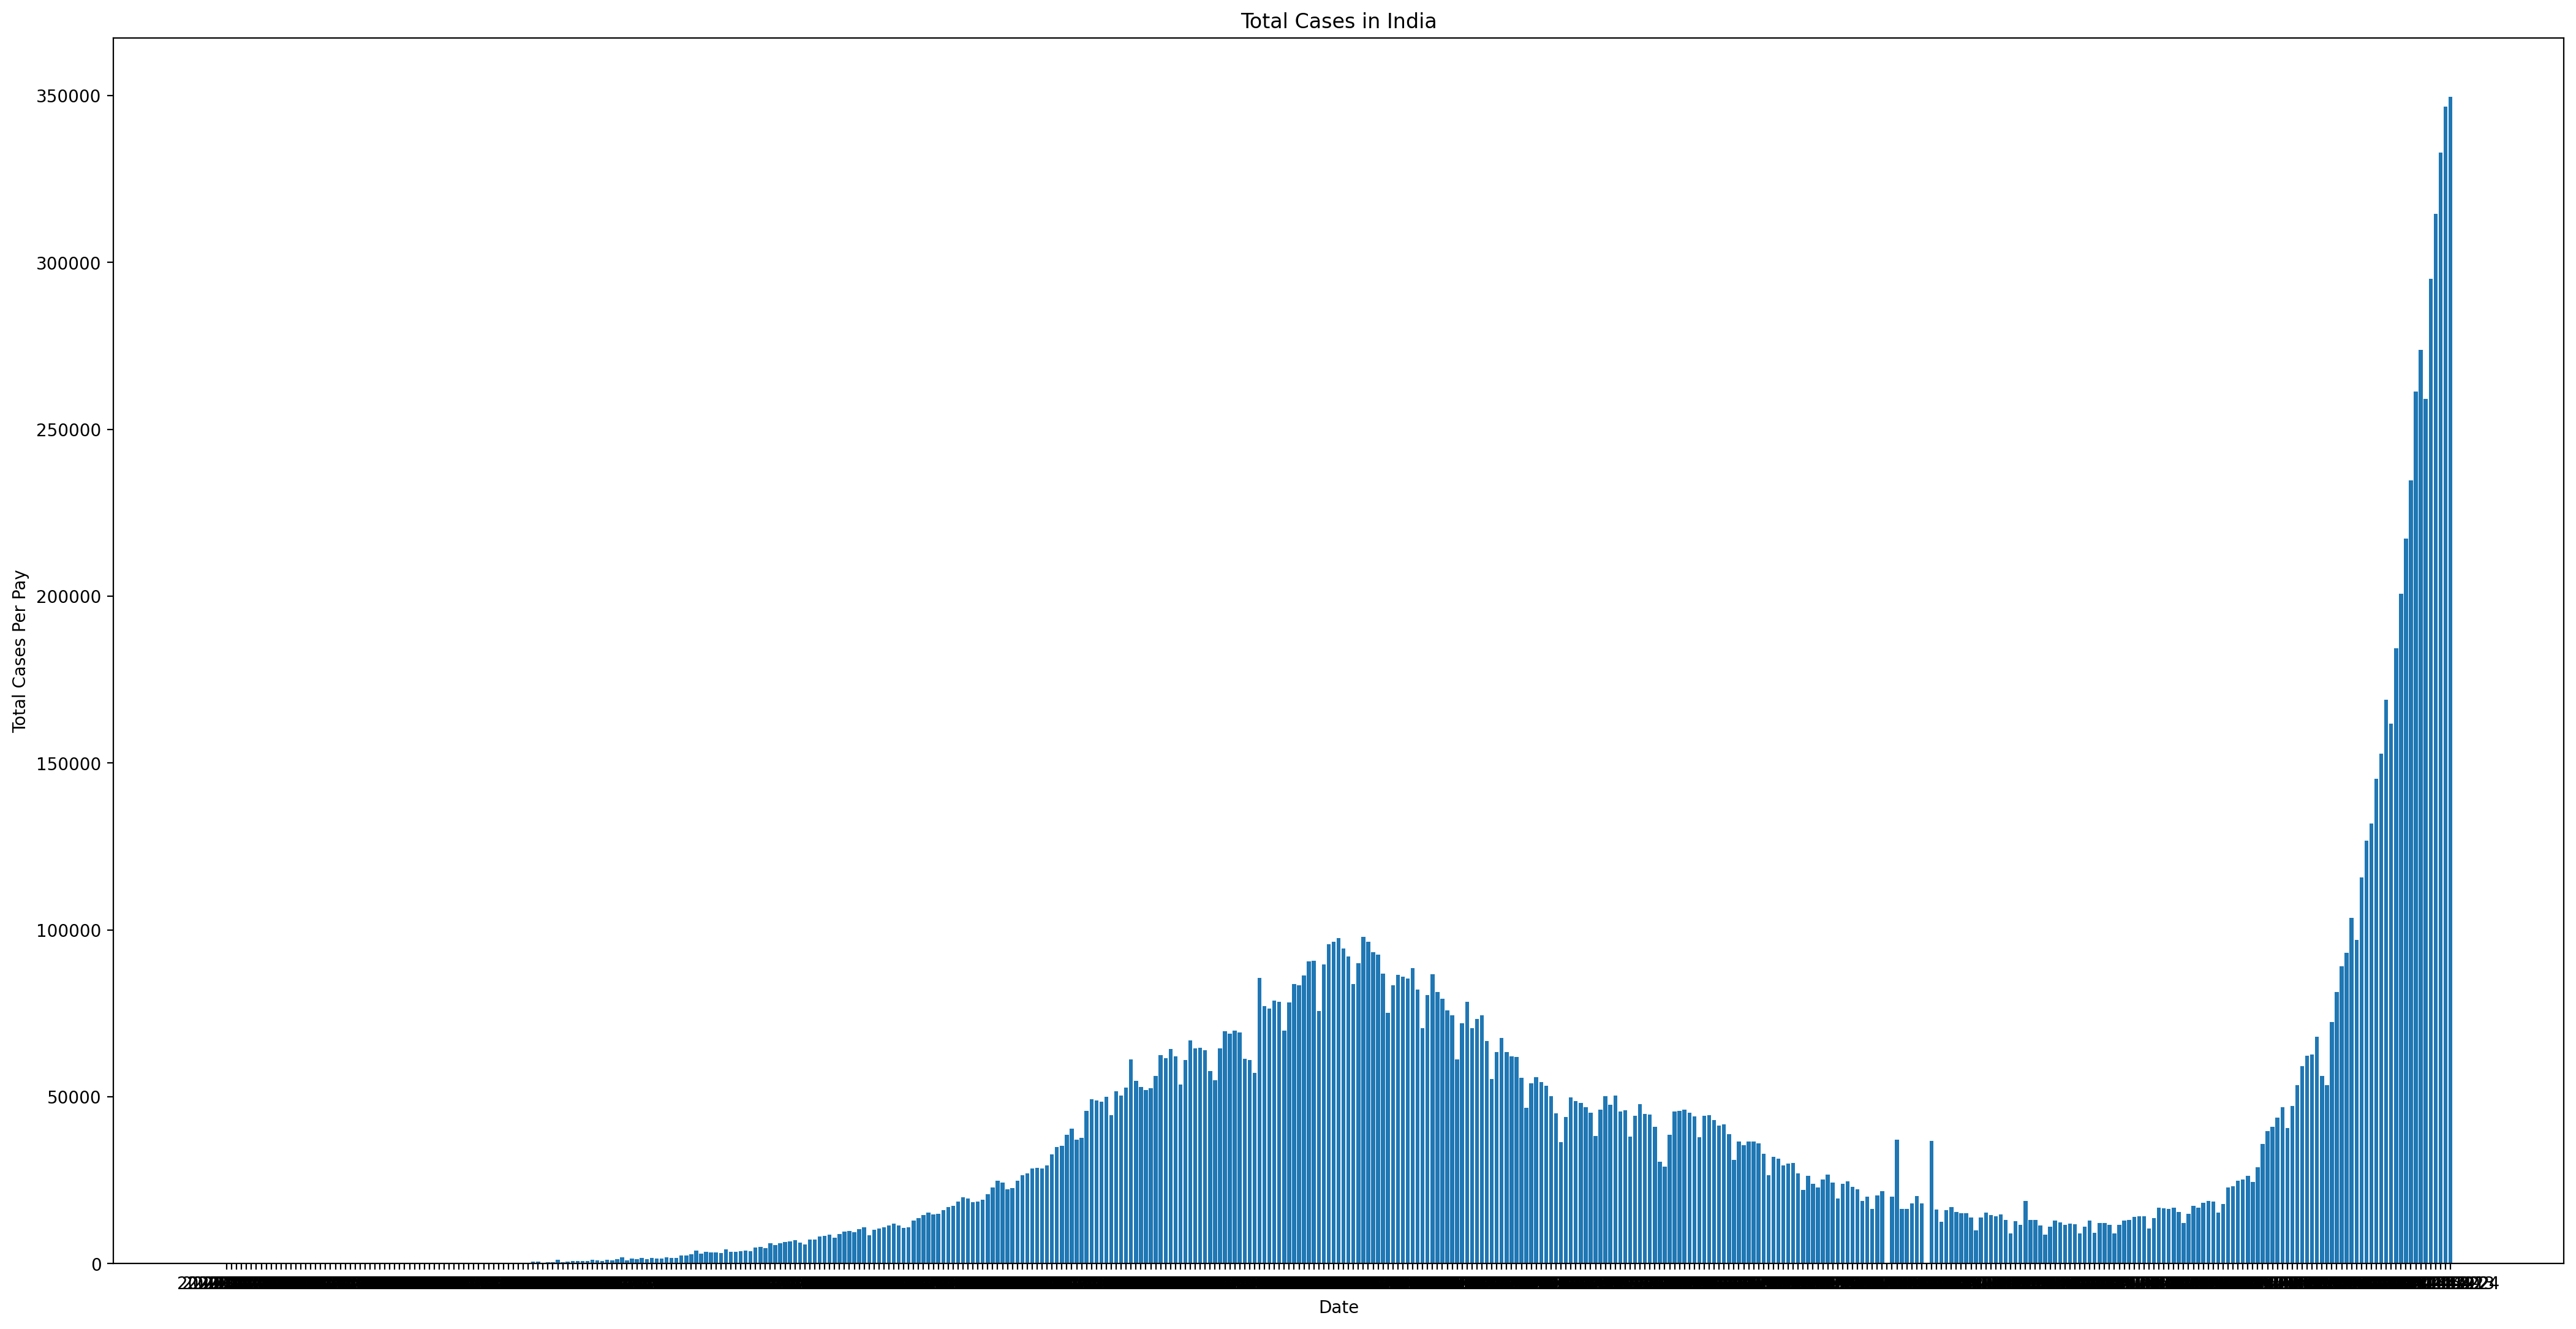

In [10]:
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(data_india.date,data_india.new_cases)
axes.set_title("Total Cases in India")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases Per Pay")
plt.show()

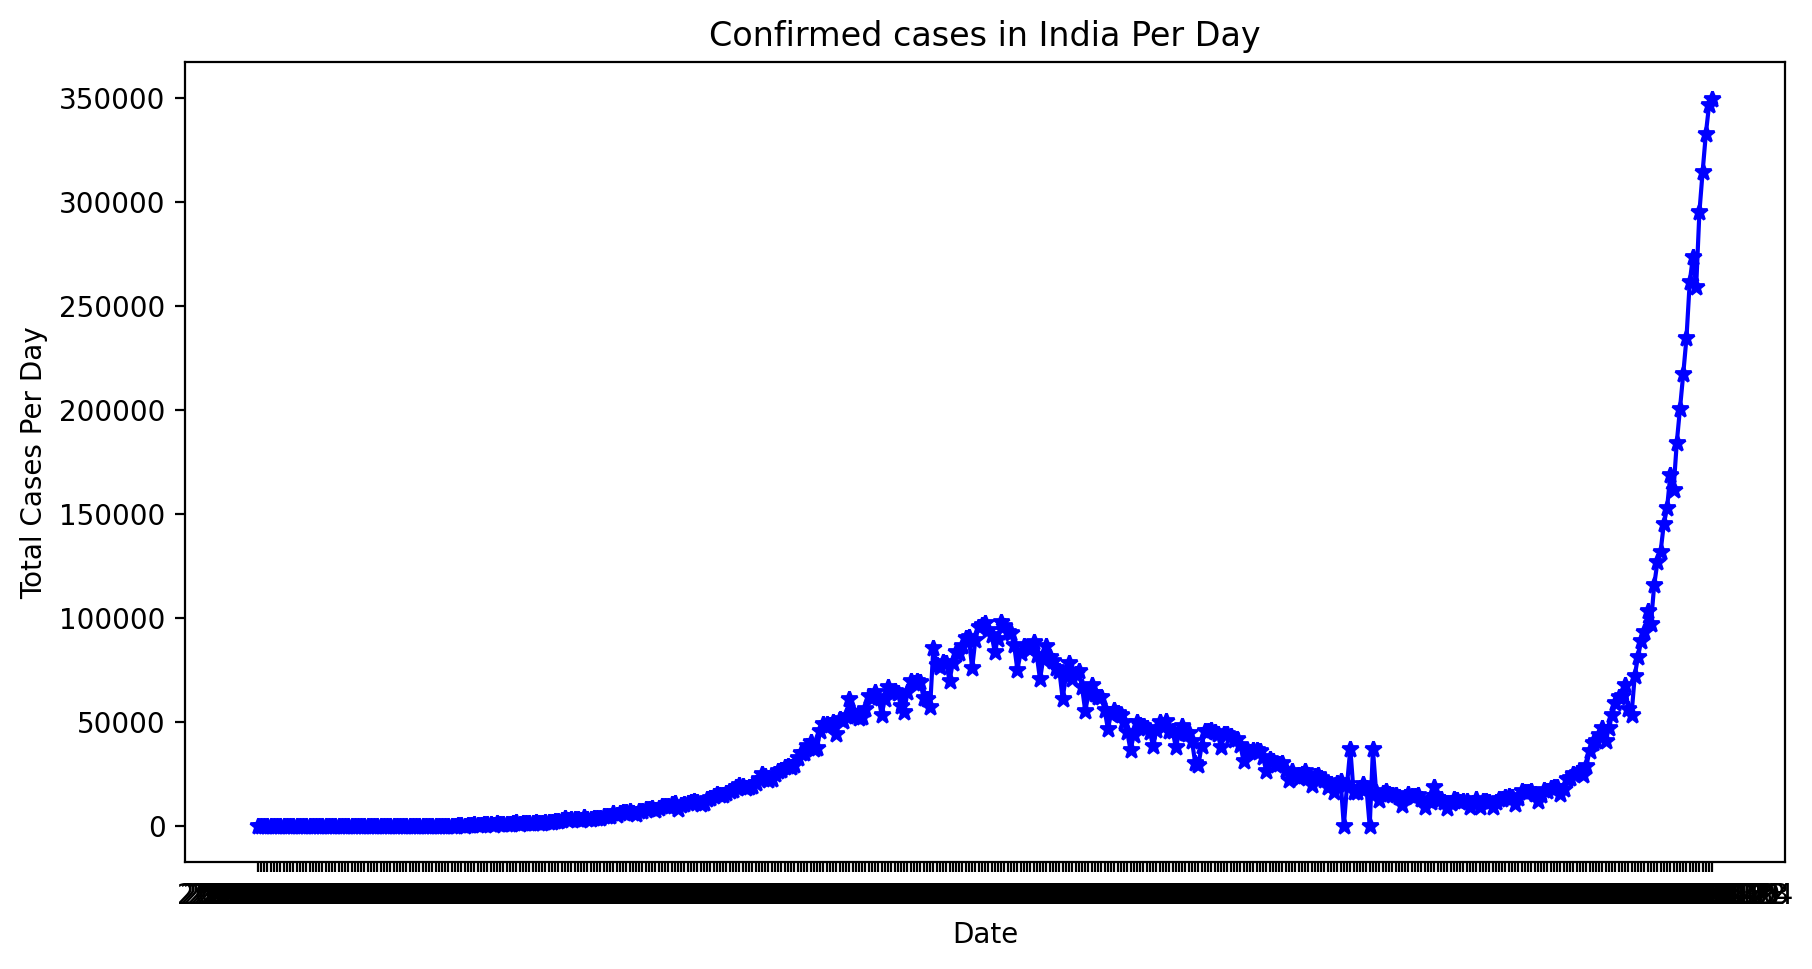

In [11]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data_india.date,data_india.new_cases,color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases Per Day")
axes.set_title("Confirmed cases in India Per Day")
plt.show()

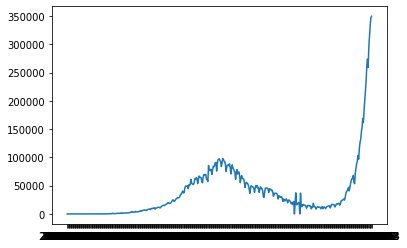

In [12]:
plt.plot(data_india.date,data_india.new_cases)

In [13]:
X = data_india.date
y = data_india.new_cases

In [14]:
X.shape
# X.ndim
type(X)

pandas.core.series.Series

In [15]:
X.head()
# X.info()

0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
Name: date, dtype: object

In [16]:
X = X.to_frame()

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X[["year", "month", "day"]] = X["date"].str.split("-", expand = True)

In [19]:
X.head()

,date,year,month,day
0,2020-01-30,2020,01,30
1,2020-01-31,2020,01,31
2,2020-02-01,2020,02,01
3,2020-02-02,2020,02,02
4,2020-02-03,2020,02,03


In [20]:
X.drop(columns=['date'],inplace = True)

In [21]:
X.dtypes

year     object
month    object
day      object
dtype: object

In [22]:
X.day = X.day.astype('int64')
X.month = X.month.astype('int64')
X.year = X.year.astype('int64')

In [23]:
X.dtypes

year     int64
month    int64
day      int64
dtype: object

In [24]:
y = y.astype('int64')
y.dtypes

dtype('int64')

In [25]:
X.head()

,year,month,day
0,2020,1,30
1,2020,1,31
2,2020,2,1
3,2020,2,2
4,2020,2,3


In [26]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (451, 3)
Shape of y:  (451,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = 101)

In [28]:
X_train.size

1080

In [29]:
y_train.size

360

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
prediction = lr.predict(X_test)

In [33]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  26768.461481222414
MSE:  2112665310.4105058
RMSE:  45963.73908213415
R squared:  0.28734273320413806


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
prediction = ridge.predict(X_test)

In [35]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  26706.13441501345
MSE:  2118011078.2761133
RMSE:  46021.85435503564
R squared:  0.28553946588240176


In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
prediction = lasso.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  26767.984250679285
MSE:  2112698455.877095
RMSE:  45964.09964175405
R squared:  0.2873315523713247


In [38]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
r=Ridge()
parameters={'alpha':[1,20]}
l=RandomizedSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(X_train,y_train)
prediction = l.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  26706.13441501345
MSE:  2118011078.2761133
RMSE:  46021.85435503564
R squared:  0.28553946588240176
C:\Python_390\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [39]:
r=Ridge()
parameters={'alpha':[1000,100,30,40,50]}
l=GridSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(X_train,y_train)
prediction = l.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  27377.38306162007
MSE:  2290161965.191193
RMSE:  47855.63671283868
R squared:  0.22746846905160434


In [40]:
l.best_params_


{'alpha': 30}

In [41]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
prediction = rf_random.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
MAE:  2706.849313186814
MSE:  27653981.107345745
RMSE:  5258.705269108143
R squared:  0.9906715888717101


In [44]:
X_test

,year,month,day
12,2020,2,11
19,2020,2,18
441,2021,4,15
211,2020,8,28
266,2020,10,22
...,...,...,...
432,2021,4,6
141,2020,6,19
51,2020,3,21
4,2020,2,3


In [45]:
date = X_test.loc[421]
date = date.to_frame()
# np.reshape(date,(3,1))
date = date.transpose()

In [46]:
date.shape
# date = date.iloc[:, ::-1]
# date.head()

date = date.iloc[:,::-1]
type(date)
date

,day,month,year
421,26,3,2021


In [47]:
r=RandomForestRegressor(n_estimators=100)

r.fit(X_train,y_train)


RandomForestRegressor()

In [48]:
prediction = r.predict([[2021,4,25]])

In [49]:
prediction


array([341000.05])

In [50]:
data_india.query('date=="2021-04-26"')

,continent,location,date,new_cases


In [73]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(r, open(filename, 'wb'))

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction = loaded_model.predict([[2021,4,25]])
prediction

array([341000.05])